In [ ]:
from platform import java_ver
from obspy.core import read
import numpy as np
import matplotlib.pyplot as plt
data1=read('/home/alex/Prospeccion-geofisica/Cert1/1.dat')
data2=read('/home/alex/Prospeccion-geofisica/Cert1/10.dat')
data1_copy=data1
data2_copy=data2
k=1
i=1
for tr in data1:
    tr.stats.distance=k
    k+=4
    tr.stats.network='AB-PV'
    tr.stats.station=str(i)
    i+=1
j=93
l=1
for tr in data2:
    tr.stats.distance=j
    j-=4
    tr.stats.network='AB-PV'
    tr.stats.station=str(l)
    l+=1
    
fig = plt.figure()
data1.plot(type='section', show=False, fig=fig, orientation='horizontal',scale=1)
list=[]
for i in np.arange(1,97,4):
    list.append(str(i))
# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
for tr in data1:
    ax.text(2.0,tr.stats.distance/1000, tr.stats.station,color='r')
ytick=np.arange(0.001,0.097,0.004)
ax.set_ylabel('Offset[m]')
ax.set_yticks(ytick,list)
ax.text(2.1,0.05,'Geófono',rotation=90,color='r')
ax.set_title('1 PELEHUE')


In [ ]:
fig2 = plt.figure()
data1.plot(type='section', show=False, fig=fig2, orientation='horizontal',scale=1,color='b')
data2.plot(type='section', show=False, fig=fig2, orientation='horizontal',scale=1,color='r')
list=[]
for i in np.arange(1,97,4):
    list.append(str(i))
# Plot customization: Add station labels to offset axis
ax2=fig2.axes[0]
#for tr in data2:
#    ax2.text(2.0,tr.stats.distance/1000, tr.stats.station,color='r')
ytick=np.arange(0.001,0.097,0.004)
ax2.set_ylabel('Offset[m]')
ax2.set_yticks(ytick,list)
#ax2.text(2.1,0.05,'Geófono',rotation=90,color='r')
ax2.set_title('1 PELEHUE= AZUL , 10 PELEHUE=ROJO')


In [ ]:
time1P=np.loadtxt('1PELEHUE.txt')-12
time10P=np.loadtxt('10PELEHUE.txt')-35
# PRIMERA LLEGADA 1PELEHUE
fig1=plt.figure()
data1.plot(type='section',show=False,fig=fig1,orientation='horizontal',scale=1,color='w')
ax1=fig1.axes[0]
ax1.set_facecolor(color='black')
ytick=np.arange(0.001,0.097,0.004)
ax1.set_ylabel('Offset[m]')
ax1.set_yticks(ytick,list)
ax1.scatter(time1P,ytick,color='r',s=3)
ax1.set_title('1 PELEHUE')
# PRIMERA LLEGADA 10 PELEHUE
fig2=plt.figure()
data2.plot(type='section', show=False, fig=fig2, orientation='horizontal',scale=1,color='k')
ax2=fig2.axes[0]
ytick=np.arange(0.001,0.097,0.004)
ax2.set_ylabel('Offset[m]')
ax2.set_yticks(ytick,list)
ax2.scatter(time10P,ytick,color='r',s=3)
ax2.set_title('10 PELEHUE')
for tr in data1:
    ax1.text(2.0,tr.stats.distance/1000, tr.stats.station,color='r')
ax1.text(2.1,0.05,'Geófono',rotation=90,color='r')
for tr in data2[::-1]:
    ax2.text(2.0,tr.stats.distance/1000, tr.stats.station,color='r')
ax2.text(2.1,0.05,'Geófono',rotation=90,color='r')
ytick=np.arange(0.001,0.097,0.004)
fig1.savefig('1PELEHUE.png')
fig2.savefig('10PELEHUE.png')

# figura de ambas curvas de distancia tiempo
dist=np.arange(1,97,4)         
fig, ax = plt.subplots()
plt.grid(linestyle='dashed')
ax.scatter(dist,time1P)
ax.scatter(dist[::-1],time10P)
ax.set_xticks(dist,list)
ax.scatter(0,-0.005,marker="*", s=200,c='dodgerblue')
ax.scatter(94,-0.005,marker="*", s=200,c='darkorange')
ax.text(3,-0.007,'SHOTPOINT',fontweight="bold",c='dodgerblue')
ax.text(71,-0.007,'SHOTPOINT',fontweight="bold",c='darkorange')
## slopes 1 pelehue
ax.plot([1,9],[time1P[0],time1P[2]],c='dodgerblue') # first slope
ax.plot([0,93],[time1P[3]-0.005,time1P[-1]+0.002],c='dodgerblue',linewidth=2.5) # second slope
## slopes 10 pelehue
ax.plot([85,93],[time10P[2],time10P[0]],c='darkorange') # first slope
ax.plot([1,93],[time10P[-1]-0.001,time10P[2]-0.005],c='darkorange',linewidth=2.5) # second slope

ax.set_ylabel('Tiempo[s]')
ax.set_xlabel('Distancia [m]')
ax.set_title('Curva distancia tiempo')
ax.legend(['1 PELEHUE','10 PELEHUE'],loc='lower center')
print(time1P[3])
print(time1P[-1])
fig.savefig('CurvaDist-tiempo.png')

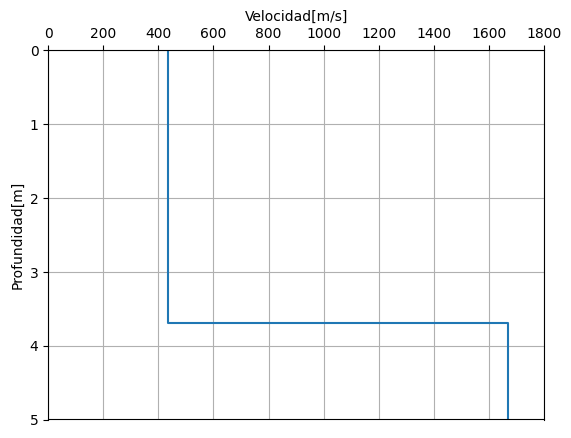

In [40]:
# plot velocity vs depth
fig,ax=plt.subplots()
ax.invert_yaxis()
ax.plot([435,435,1667,1667],[0,3.7,3.7,5])
ax.xaxis.tick_top()
ax.set_xlim(0,1800)
ax.set_ylim(5,0)
ax.set_ylabel('Profundidad[m]')
ax.set_xlabel('Velocidad[m/s]')
ax.xaxis.set_label_position('top')
ax.grid()
fig.savefig('vel-depth.png')

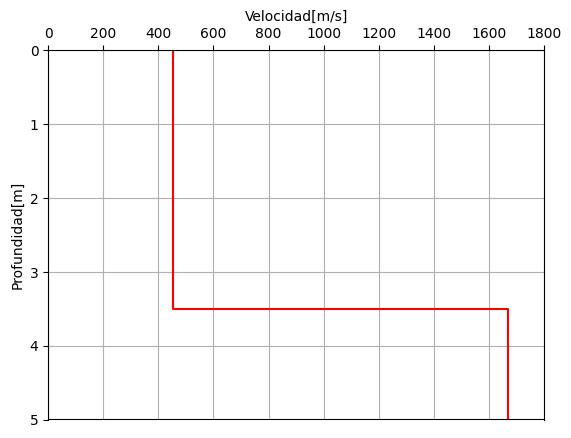

In [39]:
raiz=(1/454**2+1/1667**2)**0.5
tau=0.016
depth=tau/(2*raiz)
depth

# plot velocity vs depth
fig,ax=plt.subplots()
ax.invert_yaxis()
ax.plot([454,454,1667,1667],[0,3.5,3.5,5],c='r')
ax.xaxis.tick_top()
ax.set_xlim(0,1800)
ax.set_ylim(5,0)
ax.set_ylabel('Profundidad[m]')
ax.set_xlabel('Velocidad[m/s]')
ax.xaxis.set_label_position('top')
ax.grid()
fig.savefig('vel-depth2.png')